Task1_0730. 교차 검증을 위한 사용자 함수를 생성한 후 아래 회귀트리 모델들에 대한 교차검증을 수행하세요.
- dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
- rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
- gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
- xgb_reg = XGBRegressor(n_estimators=1000)
- lgb_reg = LGBMRegressor(n_estimators=1000, verbose=-1)

In [14]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = fetch_openml(name="Boston", parser='auto', version=1)
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.drop(['CHAS','RAD'],axis=1,inplace=True)
boston_df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   TAX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   B        506 non-null    float64
 10  LSTAT    506 non-null    float64
 11  PRICE    506 non-null    float64
dtypes: float64(12)
memory usage: 47.6 KB


In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score

# 회귀모델 평가 함수
def get_model_cv_prediction(X_data, y_target):
    models = {
        'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0, max_depth=4),
        'RandomForestRegressor': RandomForestRegressor(random_state=0, n_estimators=1000),
        'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0, n_estimators=1000),
        'XGBRegressor': XGBRegressor(n_estimators=1000),
        'LGBMRegressor': LGBMRegressor(n_estimators=1000, verbose=-1)
    }

    for model_name, model in models.items():
        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'{model_name} 5 폴드 세트의 평균 RMSE: {avg_rmse:.4f}')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [16]:
X_data = boston_df.drop('PRICE', axis=1)
y_target = boston_df['PRICE']

get_model_cv_prediction(X_data, y_target)

DecisionTreeRegressor 5 폴드 세트의 평균 RMSE: 5.9346
RandomForestRegressor 5 폴드 세트의 평균 RMSE: 4.4313
GradientBoostingRegressor 5 폴드 세트의 평균 RMSE: 4.2589
XGBRegressor 5 폴드 세트의 평균 RMSE: 5.0446
LGBMRegressor 5 폴드 세트의 평균 RMSE: 4.6226


<Axes: xlabel='None', ylabel='None'>

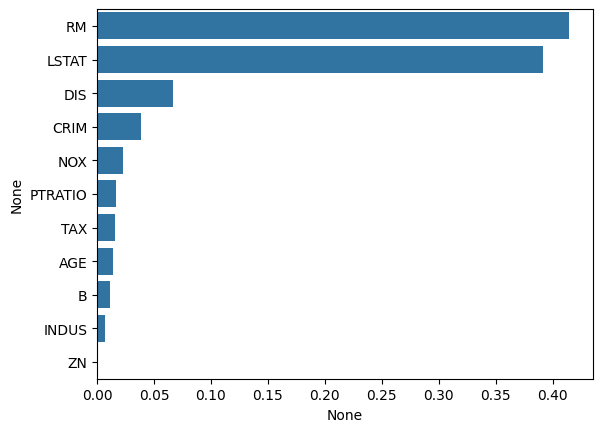

In [17]:
import seaborn as sns

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만드렁진 X_data, y_target 데이터셋을 적용하여 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

<Axes: xlabel='None', ylabel='None'>

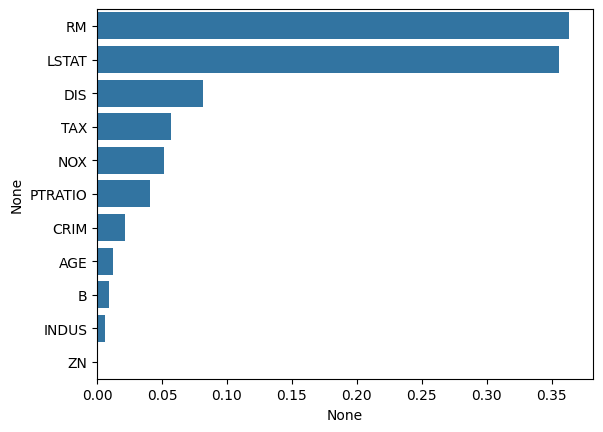

In [19]:
import seaborn as sns

xgb_reg = XGBRegressor(n_estimators=1000)

# 앞 예제에서 만드렁진 X_data, y_target 데이터셋을 적용하여 학습
xgb_reg.fit(X_data, y_target)

feature_series = pd.Series(data=xgb_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 11
[LightGBM] [Info] Start training from score 22.532806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

<Axes: xlabel='None', ylabel='None'>

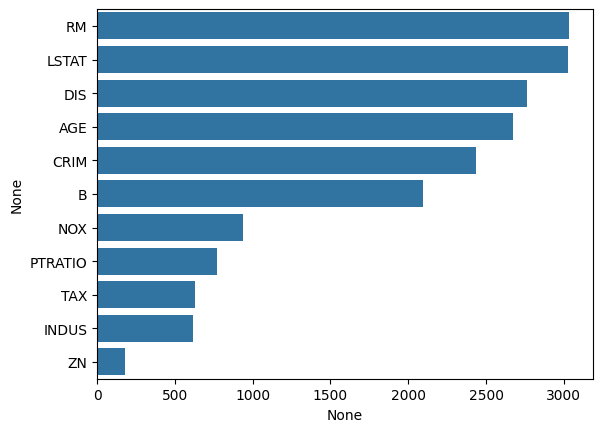

In [20]:
import seaborn as sns

lgb_reg = LGBMRegressor(n_estimators=1000)

# 앞 예제에서 만드렁진 X_data, y_target 데이터셋을 적용하여 학습
lgb_reg.fit(X_data, y_target)

feature_series = pd.Series(data=lgb_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [21]:
# sample() 은 pandas의 DataFrame 또는 Series의 축에서 항목을 무작위로 샘플링하는데 사용되는 다목적 도구
boston_df.sample(n=3,random_state=1)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
307,0.04932,33.0,2.18,0.472,6.849,70.3,3.1827,222.0,18.4,396.90,7.53,28.2
343,0.02543,55.0,3.78,0.484,6.696,56.4,5.7321,370.0,17.6,396.90,7.18,23.9
47,0.22927,0.0,6.91,0.448,6.030,85.5,5.6894,233.0,17.9,392.74,18.80,16.6


(100, 2)


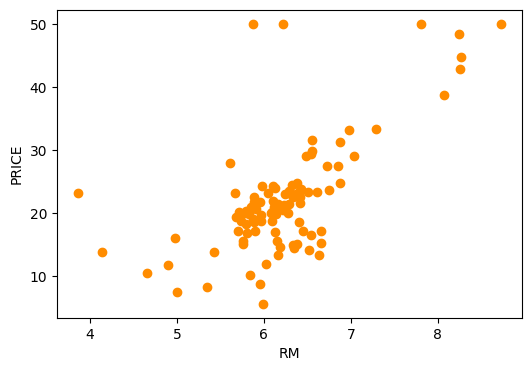

In [23]:
import matplotlib.pyplot as plt

sample_df = boston_df[['RM','PRICE']]
sample_df = sample_df.sample(n=100, random_state=0)
print(sample_df.shape)
plt.figure(figsize=(6,4))
plt.scatter(sample_df.RM, sample_df.PRICE, c='darkorange')
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

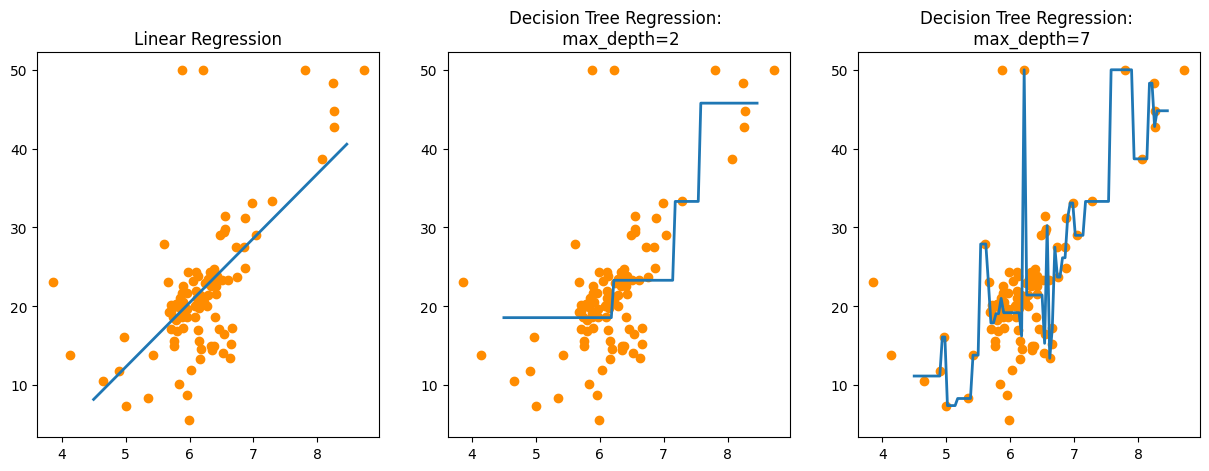

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
dt_reg2 = DecisionTreeRegressor(max_depth=2)
dt_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = sample_df['RM'].values.reshape(-1,1)
y_target = sample_df['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
dt_reg2.fit(X_feature, y_target)
dt_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_dt2 = dt_reg2.predict(X_test)
pred_dt7 = dt_reg7.predict(X_test)

fig , (ax1, ax2, ax3) = plt.subplots(figsize=(15,5), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(sample_df.RM, sample_df.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(sample_df.RM, sample_df.PRICE, c="darkorange")
ax2.plot(X_test, pred_dt2, label="max_depth:2", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(sample_df.RM, sample_df.PRICE, c="darkorange")
ax3.plot(X_test, pred_dt7, label="max_depth:7", linewidth=2)

선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만든다. max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음을 알 수 있다.

Task2_0730. iris 데이터셋에 대하여 랜덤포레스트로 학습 및 평가한 결과와 차원축소한 후 c1,c2를 적용하여 학습 평가한 결과를 비교하세요. (단 cross_val_score를 적용하여 평가)

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

iris = load_iris()
X_data = iris.data
y_target = iris.target

rf_clf = RandomForestClassifier(random_state=0, n_estimators=1000)
neg_acc_scores = cross_val_score(rf_clf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
avg_acc = np.mean(neg_acc_scores)
print(f'원본 데이터 차원: {X_data.shape}')
print(f'랜덤포레스트 5 폴드 세트의 평균 RMSE: {avg_acc:.4f}')

원본 데이터 차원: (150, 4)
랜덤포레스트 5 폴드 세트의 평균 RMSE: -0.0400


In [13]:
# 차원 축소 후 c1,c2 적용 학습 평가 결과
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data)

# PCA 후 데이터의 차원 출력
rf_clf_pca = RandomForestClassifier(random_state=0, n_estimators=1000)
neg_acc_scores_pca = cross_val_score(rf_clf_pca, X_pca, y_target, scoring="neg_mean_squared_error", cv=5)
avg_acc_pca = np.mean(neg_acc_scores_pca)
print(f'PCA 변환 후 데이터 차원: {X_pca.shape}')
print(f'PCA 변환 후 랜덤포레스트 5 폴드 세트의 평균 RMSE: {avg_acc_pca:.4f}')

PCA 변환 후 데이터 차원: (150, 2)
PCA 변환 후 랜덤포레스트 5 폴드 세트의 평균 RMSE: -0.0667


In [16]:
# teach
# 분류를 적용한 결과 비교
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

iris = load_iris()

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores)
print('평균 정확도 : {:.2f}'.format(np.mean(scores)))

cv=3인 경우의 개별 폴드 세트별 정확도: [0.98 0.94 0.96]
평균 정확도 : 0.96


In [17]:
# PCA 변환 데이터 세트 적용
pca_X = df_iris[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy',cv=3)
print('cv=3인 경우의 개별 폴드 세트별 정확도:', scores_pca)
print('평균 정확도 : {:.2f}'.format(np.mean(scores_pca)))

KeyError: "None of [Index(['pca_component_1', 'pca_component_2'], dtype='object')] are in the [columns]"


Task3_0730. 상관도가 높은 BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성에 대하여 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산하세요.

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/credit_card.xls')
df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

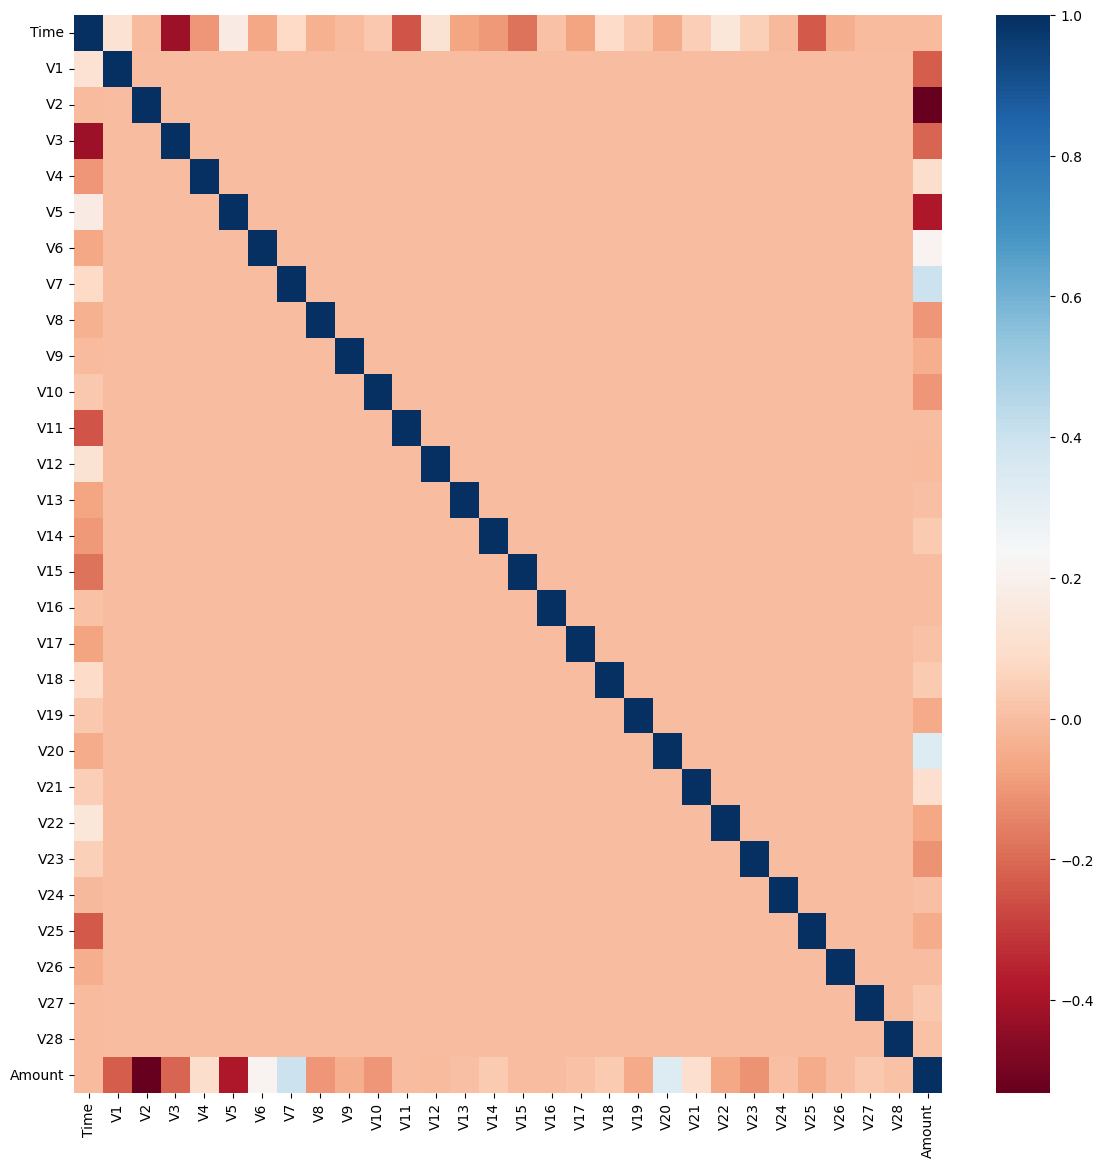

In [ ]:
# 상관계수 확인
import seaborn as sns
import matplotlib.pyplot as plt

X_features = df.drop('Class', axis=1)
corr = X_features.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=False, cmap='RdBu')
plt.show()

In [10]:
from sklearn.decomposition import PCA

high_features = ['V1', 'V2', 'V3', 'V5', 'V11', 'V25']
X_features = df[high_features]
y_target = df['Class']

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X_features)

print(f'PCA 변환 후 데이터 차원: {pca_transformed.shape}')
print(f'데이터 변동성: {pca.explained_variance_ratio_}')

NameError: name 'df' is not defined

In [4]:
# 상관도가 높은 속성을 PCA로 변환한 뒤 explained_variance_ratio_ 속성으로 확인
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 6개의 속성을 2개의 컴포넌트로 PCA 변환하고 변동성을 알아보기 위하여 explained_variance_ratio_ 계산
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
# 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명
print('PCA Component 별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


NameError: name 'X_features' is not defined

Task4_0730. 신용카드 데이터셋 전체 23개 속성에 대하여 6개의 컴포넌트를 가진 PCA 변환을 수행하고 모델은 RF, cv=3, scoring='accuracy'을 적용하여 cross_val_score()로 분류 예측 수행하세요.

In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PCA1    284807 non-null  float64
 1   PCA2    284807 non-null  float64
 2   Time    284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V6      284807 non-null  float64
 5   V7      284807 non-null  float64
 6   V8      284807 non-null  float64
 7   V9      284807 non-null  float64
 8   V10     284807 non-null  float64
 9   V12     284807 non-null  float64
 10  V13     284807 non-null  float64
 11  V14     284807 non-null  float64
 12  V15     284807 non-null  float64
 13  V16     284807 non-null  float64
 14  V17     284807 non-null  float64
 15  V18     284807 non-null  float64
 16  V19     284807 non-null  float64
 17  V20     284807 non-null  float64
 18  V21     284807 non-null  float64
 19  V22     284807 non-null  float64
 20  V23     284807 non-null  float64
 21  V24     28

In [8]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv')

# PCA 변환 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

# 나머지 21개 속성
remaining_features = df.drop(columns=high_features)

# PCA 결과와 나머지 속성 합치기
final_df = pd.concat([pca_df, remaining_features], axis=1)

# PCA 변환 후
pca_final = PCA(n_components=6)
final_pca_transformed = pca_final.fit_transform(X_features)

# 랜덤 포레스트 모델
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# 교차 검증
cv_scores = cross_val_score(rf_clf, final_pca_transformed, y_target, scoring='accuracy', cv=3)

# 결과 출력
print(f'PCA 변환 후 랜덤 포레스트 3 폴드 세트의 평균 정확도: {np.mean(cv_scores):.4f}')

# 변동성 비율 출력
print(f'PCA 변환 후 데이터 변동성 비율: {pca_final.explained_variance_ratio_:.4f}')

PCA 변환 후 랜덤 포레스트 3 폴드 세트의 평균 정확도: 0.6684
PCA 변환 후 데이터 변동성 비율: [9.99972251e-01 2.77380468e-05 1.63502185e-09 9.91002902e-10
 8.71102358e-10 7.54571727e-10]


In [12]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/kdt_240424/m5_머신러닝/dataset/creditcard.csv')

# PCA 변환 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

# 나머지 21개 속성
remaining_features = df.drop(columns=high_features)

# PCA 결과와 나머지 속성 합치기
final_df = pd.concat([pca_df, remaining_features], axis=1)

# PCA 변환 후
pca_final = PCA(n_components=6)
final_pca_transformed = pca_final.fit_transform(X_features)

# 랜덤 포레스트 모델
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# 교차 검증
cv_scores = cross_val_score(rf_clf, final_pca_transformed, y_target, scoring='accuracy', cv=3)

# 결과 출력
print(f'PCA 변환 후 랜덤 포레스트 3 폴드 세트의 평균 정확도: {np.mean(cv_scores):.4f}')

# 변동성 비율 출력 (소수점4자리)
explained_variance_ratios = pca_final.explained_variance_ratio_
formatted_ratios = ', '.join([f'{ratio:.4f}' for ratio in explained_variance_ratios])

print(f'PCA 변환 후 데이터 변동성 비율: {formatted_ratios}')

PCA 변환 후 랜덤 포레스트 3 폴드 세트의 평균 정확도: 0.6684
PCA 변환 후 데이터 변동성 비율: 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000


In [9]:
# 원본 데이터 세트와 PCA 변환한 데이터 세트의 분류 예측 결과 비교

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=150)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 개별 Fold세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

# 원본 데이터 세트의 분류 예측 결과

NameError: name 'X_features' is not defined

In [ ]:
# 전체 23개 속성의 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측결과 보다
# 1~2% 정도의 예측 성능 저하만 발생
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)
rcf = RandomForestClassifier(n_estimators=300, random_state=150)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

# 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대한 동일한 분류 예측